# KMEANS



In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:


df = pd.read_csv('/content/drive/MyDrive/ML_Project/train_data_encoded.csv')
train = pd.read_csv('/content/drive/MyDrive/ML_Project/train_data_encoded.csv')


In [49]:
columns_to_keep = [
    'size', 'rooms', 'bathrooms', 'latitude', 'longitude',
    'Primary', 'Tertiary', 'Upper_Secondary_or_Post_Secondary',
    'Distribucio_P80_20', 'American_population', 'Asian_population',
    'European_population', 'Oceanian_population', 'price'
]

# Drop all other columns except those in columns_to_keep
train = train[columns_to_keep]

In [50]:
from sklearn.cluster import KMeans

In [51]:
cluster_range = range(1, 11)
# List to store the inertia values
inertia = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)

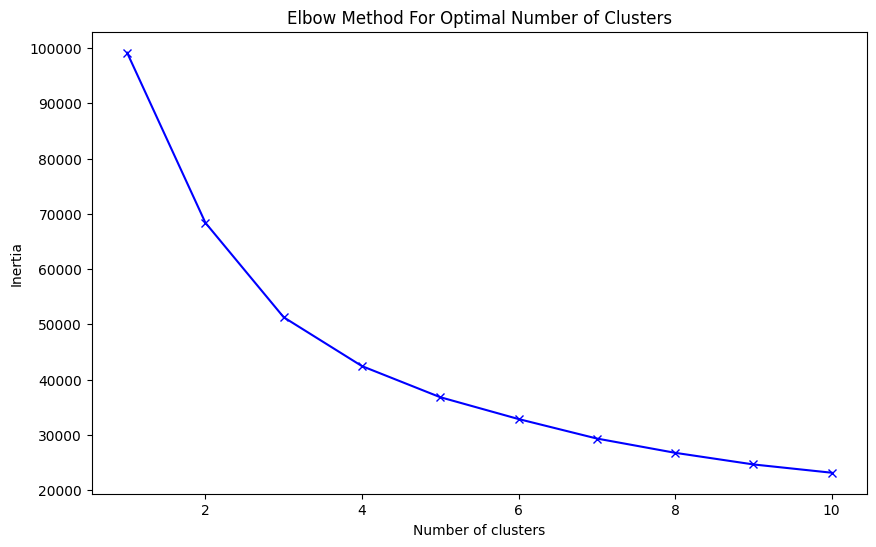

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

We can choose 4 as the number of clusters because: we look for the "elbow" point in the plot where the inertia starts to decrease more slowly. This point indicates the optimal number of clusters. As we can see, the slope at 4 starts to decrease more slowly.

In [89]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(train)

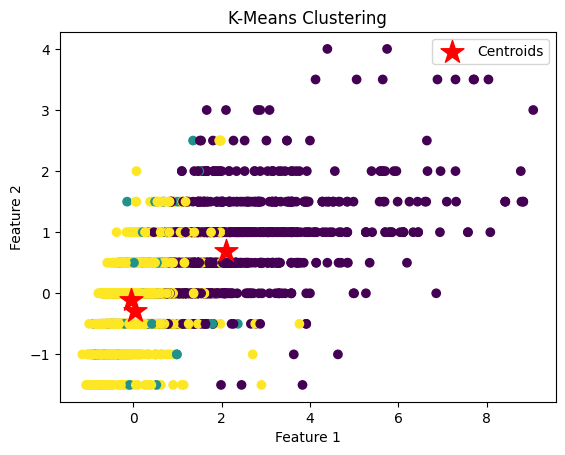

In [90]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.scatter(train.iloc[:, 0], train.iloc[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

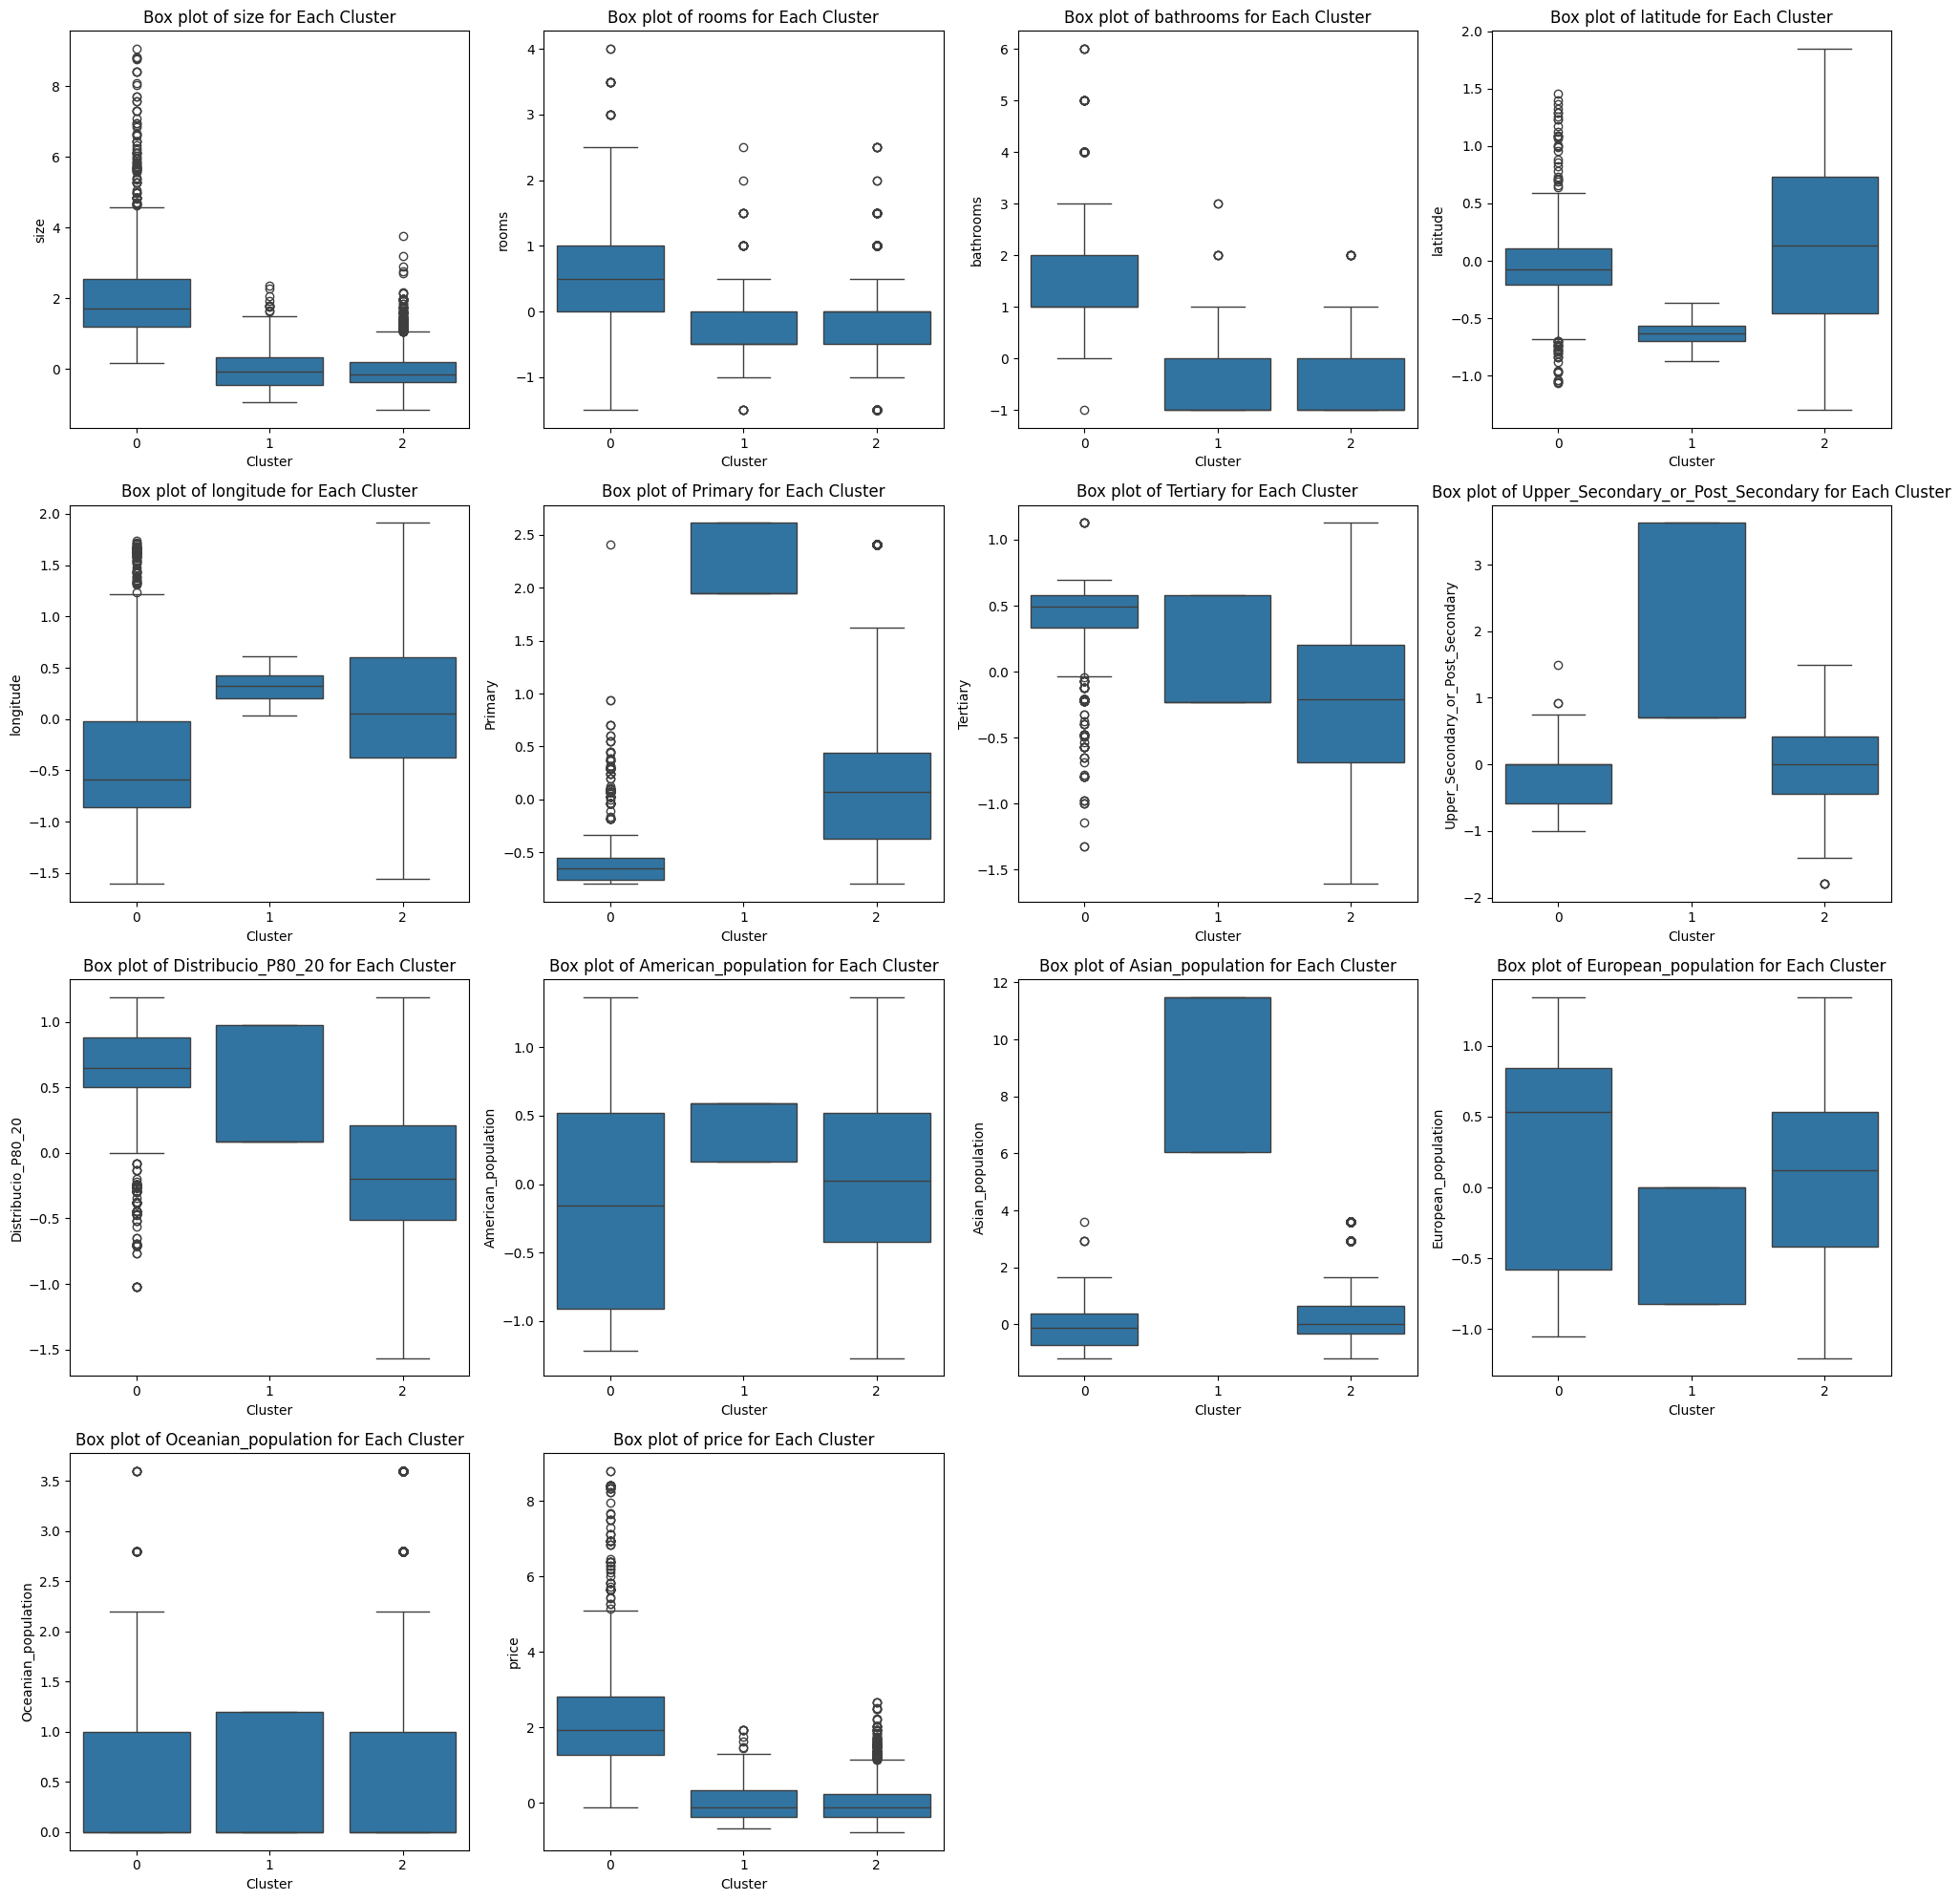

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign cluster labels to each data point
train['Cluster'] = kmeans.labels_

# Get the list of all variables
variables = train.columns[:-1]  # Exclude the 'Cluster' column

# Calculate the number of rows needed (4 plots per row)
n_vars = len(variables)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable in its corresponding subplot
for idx, variable in enumerate(variables):
    sns.boxplot(x='Cluster', y=variable, data=train, ax=axes[idx])
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(variable)
    axes[idx].set_title(f'Box plot of {variable} for Each Cluster')

# Remove any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
cluster_sizes = train['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
Cluster
2    5457
0    1314
1     361
Name: count, dtype: int64


In [93]:
print("Inertia (Sum of Squared Distances to Nearest Centroid):")
print(kmeans.inertia_)

Inertia (Sum of Squared Distances to Nearest Centroid):
51429.78213905501


In [94]:
cluster_profiles = train.groupby('Cluster').mean()
cluster_profiles

,size,rooms,bathrooms,latitude,longitude,Primary,Tertiary,Upper_Secondary_or_Post_Secondary,Distribucio_P80_20,American_population,Asian_population,European_population,Oceanian_population,price
Cluster,,,,,,,,,,,,,,
0,2.109203,0.697869,1.312024,-0.042947,-0.415457,-0.563333,0.387960,-0.175022,0.547025,-0.270620,-0.158645,0.154885,0.552816,2.329967
1,0.035192,-0.288089,-0.440443,-0.627788,0.314528,2.236862,0.121718,1.972737,0.474721,0.403894,9.119506,-0.356694,0.521884,0.040648
2,-0.044278,-0.107660,-0.470771,0.165246,0.132409,0.151025,-0.272967,-0.053830,-0.122213,0.094453,0.332467,0.075569,0.568408,-0.018968


In [95]:
print(train[train["Cluster"]==0])

          size  rooms  bathrooms  latitude  longitude   Primary  Tertiary  \
6     2.126761    1.0        3.0 -0.032796  -0.767006 -0.760238  0.490673   
15    2.028169    1.0        1.0 -0.149831  -0.687916 -0.760238  0.490673   
25    2.535211    1.0        1.0  0.112054  -1.381943 -0.597364  0.331254   
29    1.253521    0.5        1.0 -0.343967   0.159916 -0.554850  0.580448   
35    2.323944    0.5        1.0 -0.022354  -0.175130 -0.367026  0.082658   
...        ...    ...        ...       ...        ...       ...       ...   
7117  2.140845    0.5        2.0 -0.318151   0.200585 -0.554850  0.580448   
7120  1.760563    0.5        1.0 -0.015338  -1.233835 -0.597364  0.331254   
7121  1.661972    3.0        1.0  0.042783  -0.141613 -0.367026  0.082658   
7125  2.521127    2.0        2.0 -0.135705   0.489059 -0.554850  0.580448   
7129  2.197183    1.0        1.0  0.253287  -0.707899 -0.749944  0.204134   

      Upper_Secondary_or_Post_Secondary  Distribucio_P80_20  \
6           

In [96]:
print(train[train["Cluster"]==3])

Empty DataFrame
Columns: [size, rooms, bathrooms, latitude, longitude, Primary, Tertiary, Upper_Secondary_or_Post_Secondary, Distribucio_P80_20, American_population, Asian_population, European_population, Oceanian_population, price, Cluster]
Index: []


In [97]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming train is your DataFrame and kmeans.labels_ contains the cluster labels
train['Cluster'] = kmeans.labels_

# Get the list of all float64 variables
variables = [variable for variable in train.columns[:-1] if train[variable].dtype == 'float64']

# Perform ANOVA and store the results
anova_results = {}

for variable in variables:
    groups = [train[train['Cluster'] == cluster][variable].dropna() for cluster in train['Cluster'].unique()]
    f_val, p_val = f_oneway(*groups)
    anova_results[variable] = {'F-Value': f_val, 'P-Value': p_val}

# Convert results to a DataFrame for easier viewing
anova_df = pd.DataFrame(anova_results).T

# Sort by F-Value to get the most important variables
anova_df = anova_df.sort_values(by='F-Value', ascending=False)

print(anova_df)


                                        F-Value        P-Value
Asian_population                   11611.804965   0.000000e+00
price                               4442.277079   0.000000e+00
size                                4355.235291   0.000000e+00
bathrooms                           3358.458476   0.000000e+00
Primary                             2933.809827   0.000000e+00
Upper_Secondary_or_Post_Secondary   1870.465556   0.000000e+00
rooms                               1243.541480   0.000000e+00
Distribucio_P80_20                  1091.141596   0.000000e+00
Tertiary                             728.089114  1.866646e-288
longitude                            360.292129  8.701487e-150
latitude                             272.371249  1.028620e-114
American_population                  235.075457   1.359588e-99
European_population                   93.761104   6.403408e-41
Oceanian_population                    0.498894   6.072231e-01


Now we can see the impolrtant variables to distingusih between clusters.

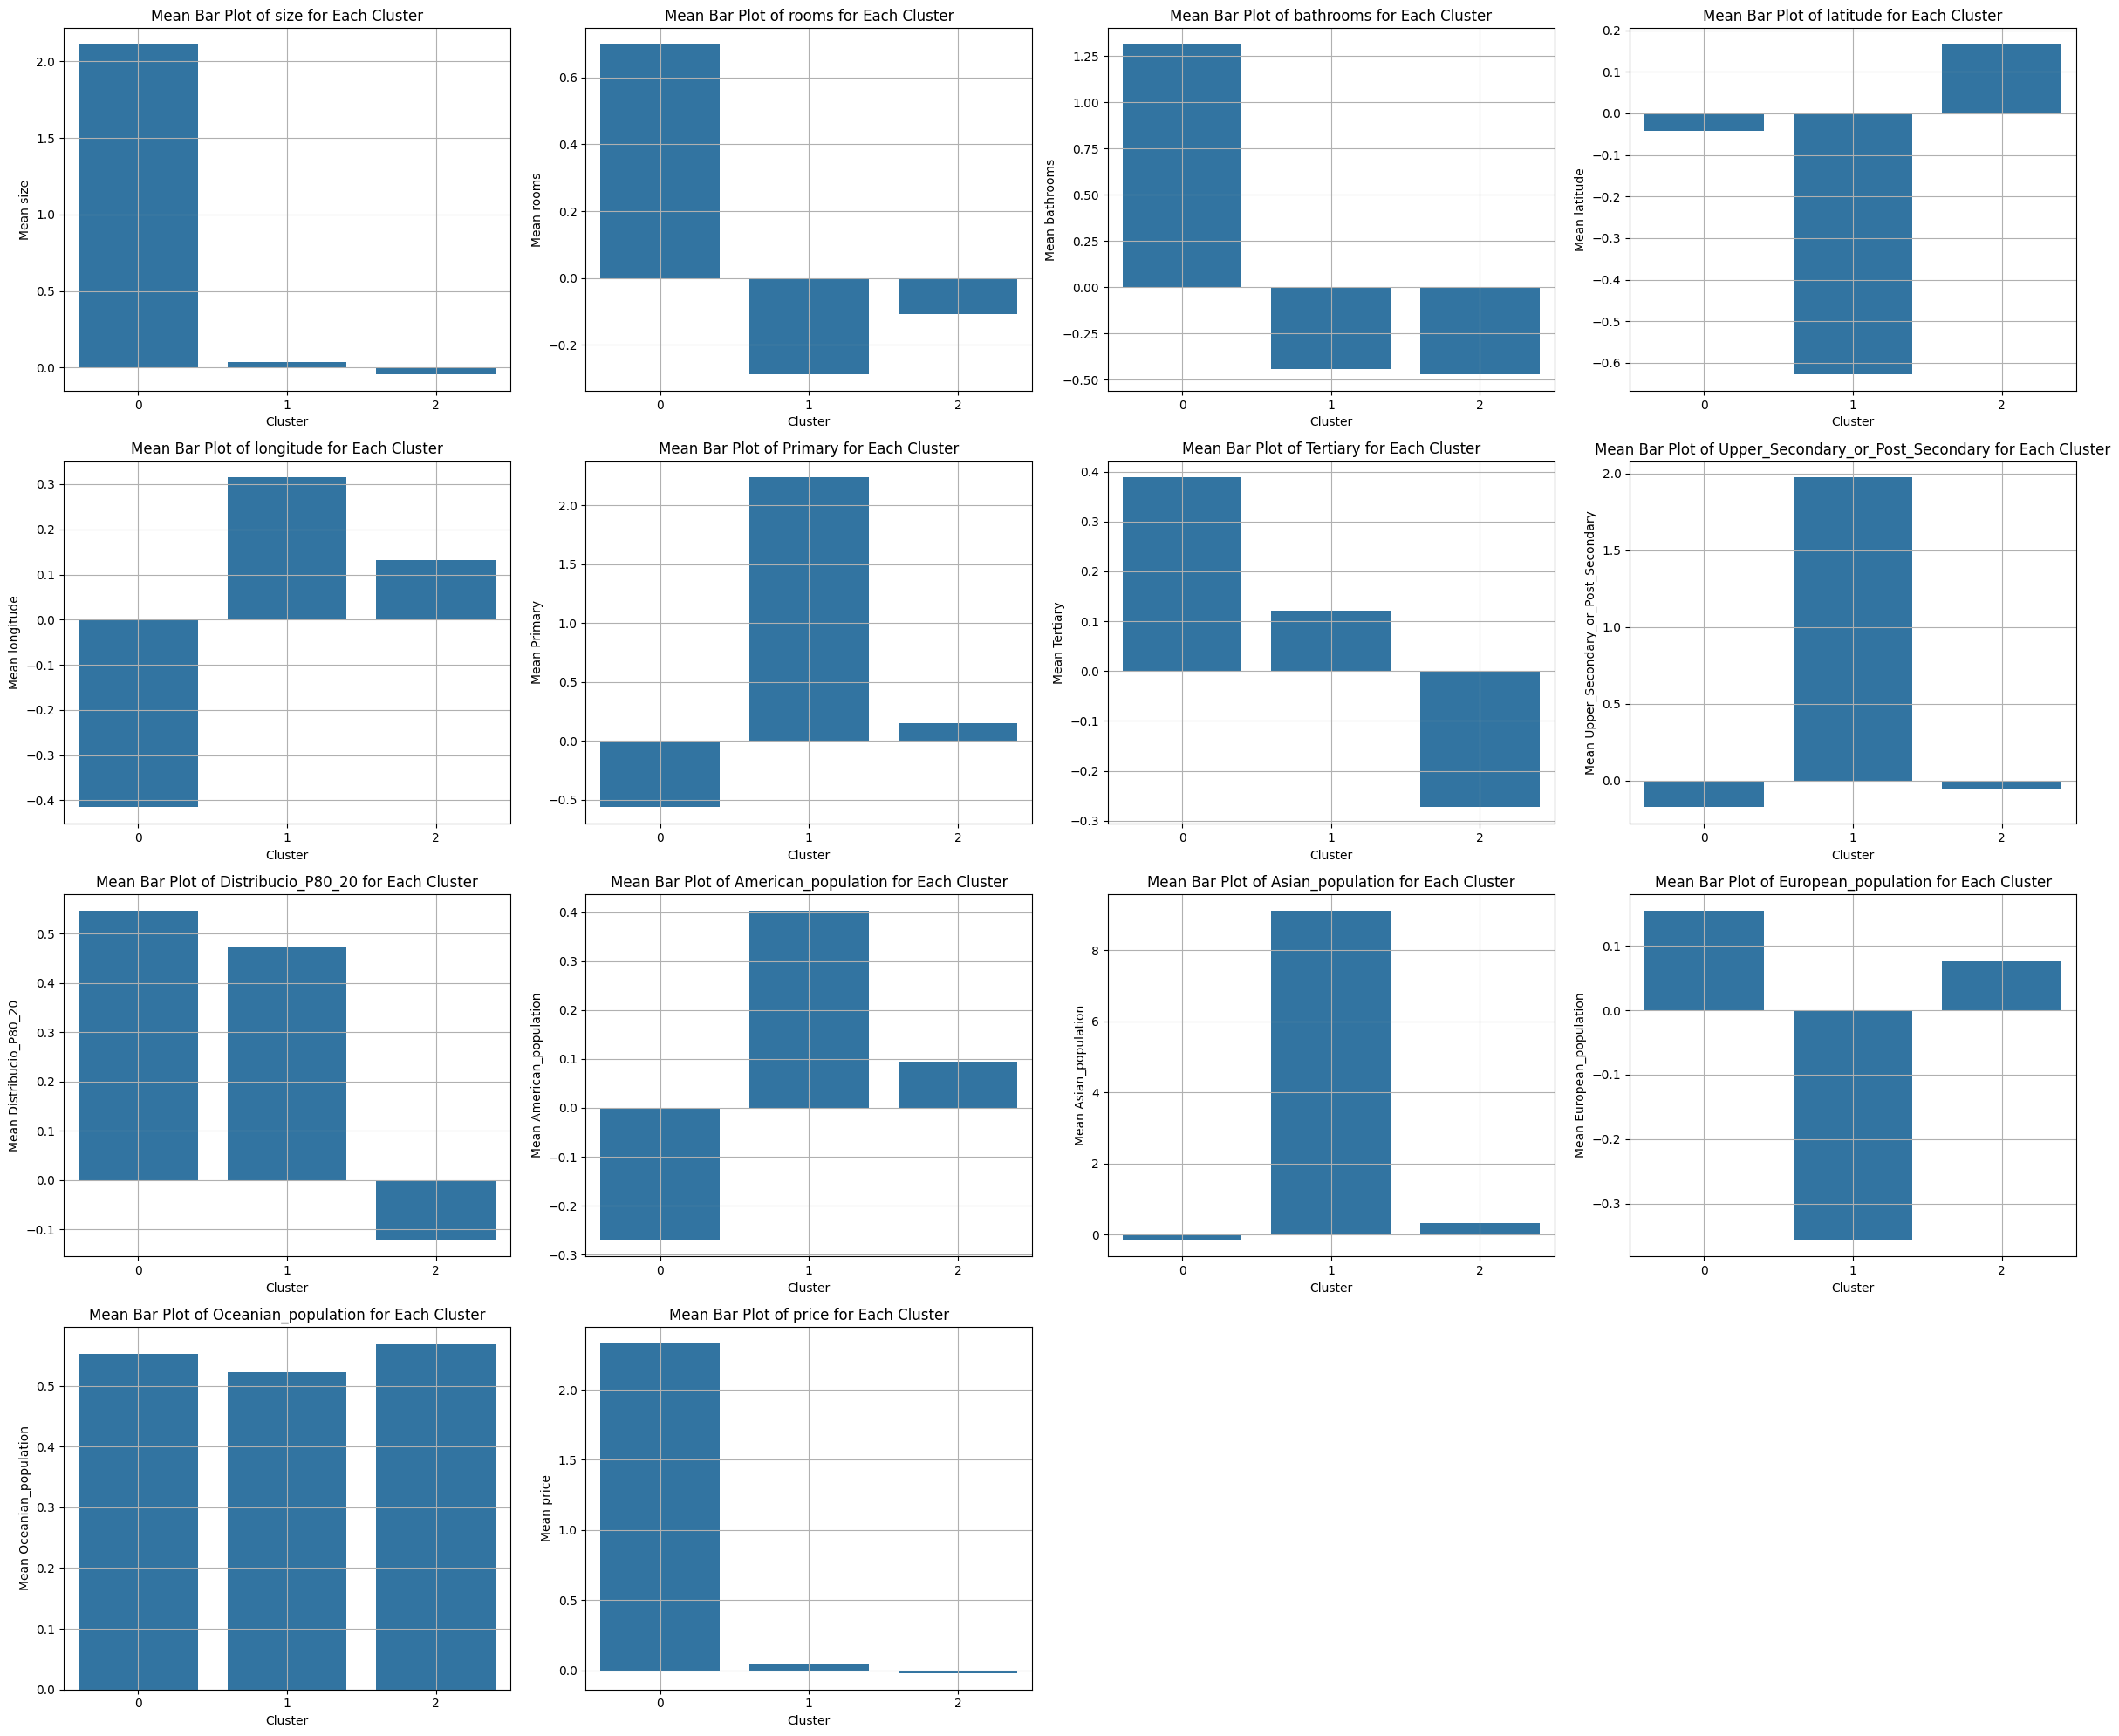

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# If you only want to suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming train is your DataFrame and kmeans.labels_ contains the cluster labels
train['Cluster'] = kmeans.labels_

# Get the list of all boolean variables (assuming boolean variables are of type float64)
boolean_variables = [variable for variable in train.columns[:-1] if train[variable].dtype == 'float64']

# Calculate the number of rows needed (6 plots per row)
n_vars = len(boolean_variables)
n_cols = 4
n_rows = (n_vars + n_cols - 1) // n_cols

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable in its corresponding subplot
for idx, variable in enumerate(boolean_variables):
    sns.barplot(x='Cluster', y=variable, data=train, estimator=np.mean, ci=None, ax=axes[idx])
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(f'Mean {variable}')
    axes[idx].set_title(f'Mean Bar Plot of {variable} for Each Cluster')
    axes[idx].grid(True)  # Add a grid for better readability

# Remove any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


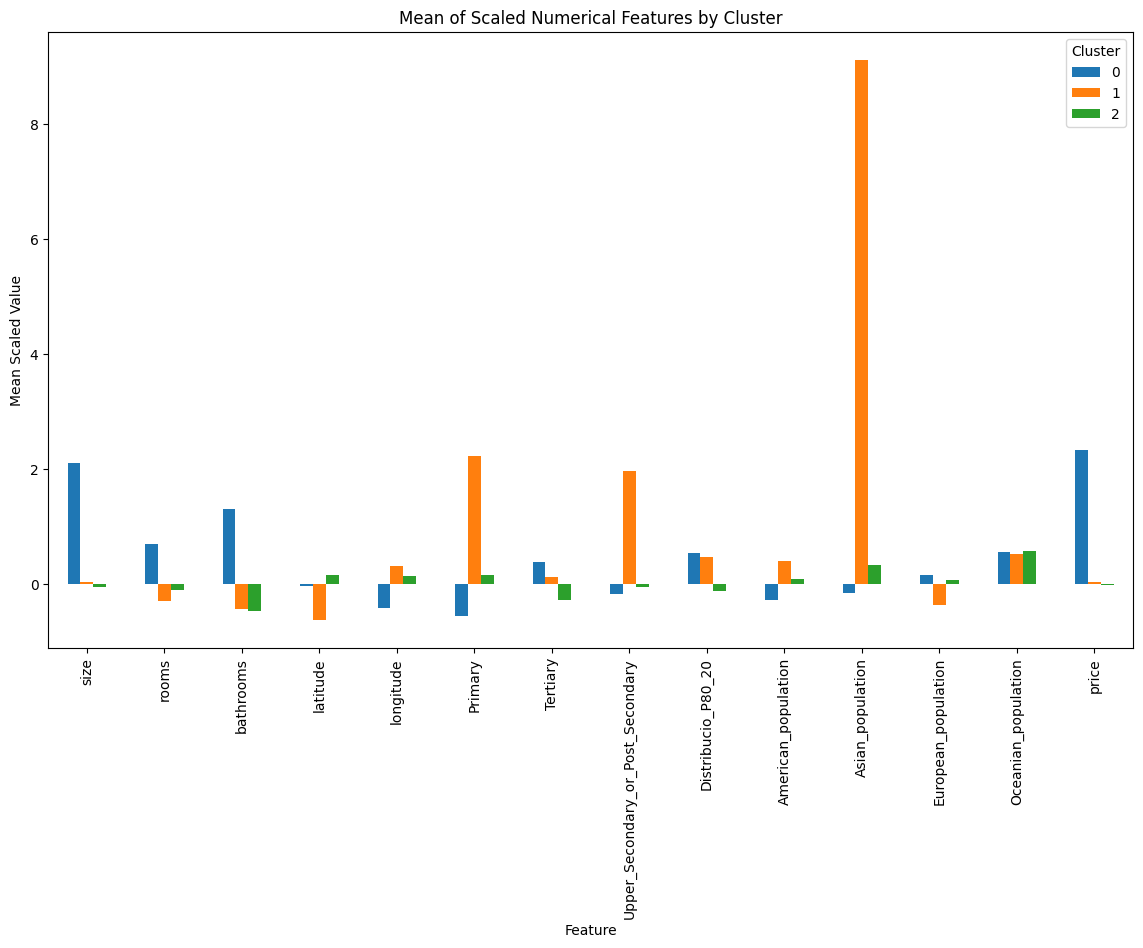

In [99]:
# Step 3: Aggregate data by clusters
cluster_means = train.groupby('Cluster').mean()

# Step 4: Create the bar plot
# Transpose the DataFrame to have features on the x-axis
cluster_means = cluster_means.T

# Plot
cluster_means.plot(kind='bar', figsize=(14, 8))
plt.title('Mean of Scaled Numerical Features by Cluster')
plt.ylabel('Mean Scaled Value')
plt.xlabel('Feature')
plt.legend(title='Cluster')
plt.show()